# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

### Importing the dataset

In [2]:
#Access input folder
current_dir = Path.cwd()
input_dir1 = Path ("G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_3")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2=  [folder1 for folder1 in input_dir1.iterdir() if folder1.is_dir()] # folder1 - RP_curves_fr7m
print ("2",input_dir2)

input G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3
2 [WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_3/RP_curves_fr11m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_3/RP_curves_fr13m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_3/RP_curves_fr7m'), WindowsPath('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Section_3/RP_curves_fr9m')]


In [3]:
#dataset = pd.DataFrame(columns = ['Charge_mass', 'Standoff_distance', 'Time', 'Pressure', 'Phase'])
df_list = []

for folder1 in input_dir2:
    
    input_dir3 =  [folder2 for folder2 in folder1.iterdir() if folder2.is_dir()] # folder2 - 07m00.5kg
    
    for folder2 in input_dir3:
        
        print ('folder', folder2)
        files1 = [file1 for file1 in folder2.rglob("*.xlsx")]
    
        for file1 in files1:
            df_list.append(pd.read_excel(file1))
            print (file1.stem)
    
dataset = pd.concat(df_list, ignore_index = True)

folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m00.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m02.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m04.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m06.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m08.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m10.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m12.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m14.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m16.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m18.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_Section_3\RP_curves_fr11m\11m20.5kg
1
2
3
4
folder G:\Chamodi\LSDYNA3D\RP_TH_models\RP_

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447098 entries, 0 to 447097
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Mass               447098 non-null  float64
 1   Standoff distance  447098 non-null  int64  
 2   Angle              447098 non-null  int64  
 3   Time               447098 non-null  float64
 4   Phase              447098 non-null  object 
 5   Pressure           447098 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 20.5+ MB


In [5]:
dataset = pd.get_dummies(dataset, columns =['Phase'], dtype = np.uint8)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447098 entries, 0 to 447097
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Mass                       447098 non-null  float64
 1   Standoff distance          447098 non-null  int64  
 2   Angle                      447098 non-null  int64  
 3   Time                       447098 non-null  float64
 4   Pressure                   447098 non-null  float64
 5   Phase_negative_decreasing  447098 non-null  uint8  
 6   Phase_negative_increasing  447098 non-null  uint8  
 7   Phase_positive             447098 non-null  uint8  
dtypes: float64(3), int64(2), uint8(3)
memory usage: 18.3 MB


In [6]:
dataset.head(30)

,Mass,Standoff distance,Angle,Time,Pressure,Phase_negative_decreasing,Phase_negative_increasing,Phase_positive
0,0.5,11,0,26.878645,13.918633,0,0,1
1,0.5,11,0,26.903898,13.800602,0,0,1
2,0.5,11,0,26.929155,13.492461,0,0,1
3,0.5,11,0,26.954411,13.072594,0,0,1
4,0.5,11,0,26.979684,12.580602,0,0,1
5,0.5,11,0,27.004956,12.038312,0,0,1
6,0.5,11,0,27.030219,11.460727,0,0,1
7,0.5,11,0,27.055499,10.856820,0,0,1
8,0.5,11,0,27.080779,10.229688,0,0,1
9,0.5,11,0,27.106066,9.589250,0,0,1


In [7]:
y = dataset['Pressure']
X = dataset.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(447098, 7) (447098,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[ 1.4530364   0.26534634 -1.56223684 ...  0.          0.
   1.        ]
 [-1.86381584  0.26534634  1.35366757 ...  0.          1.
   0.        ]
 [ 1.0204035  -1.61621321  0.38169944 ...  0.          0.
   1.        ]
 ...
 [ 1.4530364   0.26534634 -1.56223684 ...  0.          0.
   1.        ]
 [ 1.40496608 -0.67543343 -0.5902687  ...  1.          0.
   0.        ]
 [ 0.44355964 -1.61621321  0.38169944 ...  0.          0.
   1.        ]]


In [13]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[-1.47925326  1.20612612  0.38169944 ...  1.          0.
   0.        ]
 [ 1.0204035   1.20612612 -0.5902687  ...  1.          0.
   0.        ]
 [ 0.82812221 -0.67543343 -0.5902687  ...  0.          1.
   0.        ]
 ...
 [-1.47925326  0.26534634  1.35366757 ...  1.          0.
   0.        ]
 [-0.51784681  1.20612612 -0.5902687  ...  1.          0.
   0.        ]
 [-0.51784681  0.26534634  0.38169944 ...  0.          0.
   1.        ]]


In [14]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[-1.67153455  1.20612612  1.35366757 ...  0.          0.
   1.        ]
 [ 0.05899706 -1.61621321 -1.56223684 ...  1.          0.
   0.        ]
 [ 1.40496608  1.20612612  1.35366757 ...  0.          1.
   0.        ]
 ...
 [ 1.4530364  -0.67543343 -0.5902687  ...  1.          0.
   0.        ]
 [ 0.63584093  0.26534634 -0.5902687  ...  1.          0.
   0.        ]
 [-0.32556552  1.20612612 -1.56223684 ...  1.          0.
   0.        ]]


In [15]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 268258
X_test 89420
X_val 89420


## Part 3 - Building the ANN

### Initializing the ANN

In [16]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=150,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

### Adding the second hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=125,
                              activation='relu'))

### Adding the third hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=100,
                              activation='relu'))

### Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [21]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1200      
                                                                 
 dense_1 (Dense)             (None, 125)               18875     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 32,776
Trainable params: 32,776
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

### Compiling the ANN

In [22]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [23]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [24]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=40,
                    verbose=1)

Epoch 1/500
6707/6707 [==============================] - 25s 4ms/step - loss: 98.6166 - mae: 3.2265 - val_loss: 20.8601 - val_mae: 1.3511
Epoch 2/500
6707/6707 [==============================] - 24s 4ms/step - loss: 31.8256 - mae: 1.8088 - val_loss: 20.8010 - val_mae: 1.5634
Epoch 3/500
6707/6707 [==============================] - 26s 4ms/step - loss: 23.2288 - mae: 1.5127 - val_loss: 25.6269 - val_mae: 1.6180
Epoch 4/500
6707/6707 [==============================] - 26s 4ms/step - loss: 24.9533 - mae: 1.4365 - val_loss: 10.4704 - val_mae: 1.4134
Epoch 5/500
6707/6707 [==============================] - 25s 4ms/step - loss: 22.4906 - mae: 1.3146 - val_loss: 5.9913 - val_mae: 0.9561
Epoch 6/500
6707/6707 [==============================] - 25s 4ms/step - loss: 16.9324 - mae: 1.1938 - val_loss: 13.2104 - val_mae: 1.2153
Epoch 7/500
6707/6707 [==============================] - 24s 4ms/step - loss: 16.6675 - mae: 1.1728 - val_loss: 14.4819 - val_mae: 1.0393
Epoch 8/500
6707/6707 [============

### Analyse learn history

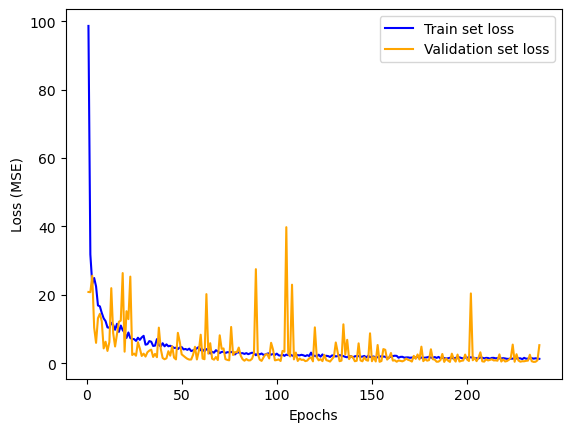

In [40]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section3_ANN1_2.png', dpi=300, bbox_inches='tight')
plt.show()

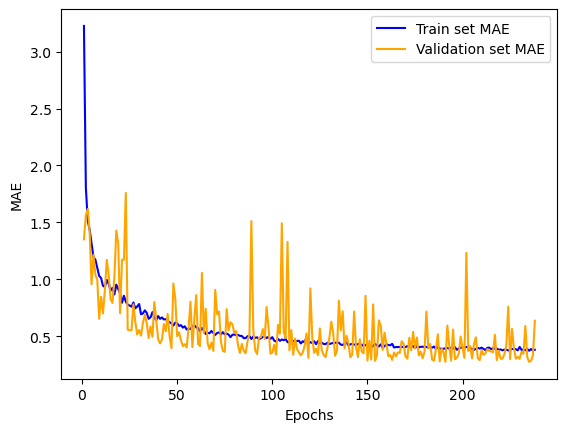

In [41]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Section3_ANN1_3.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print (epochs)

### Save the model

In [35]:
ann.save('Section3_ANN_1')
import pickle
pickle.dump(sc, open('Section3_scaler_ANN_1.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section3_ANN_1\assets


## Part 5 - Make predictions

In [ ]:
ann = load_model('ANN_13.h5')
sc = pickle.load(open('scaler_ANN.pkl', 'rb'))

2795/2795 [==============================] - 7s 3ms/step


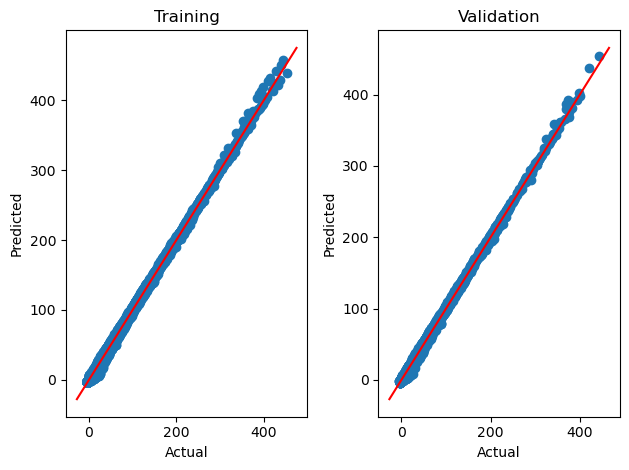

In [39]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Section3_ANN1_1.png', dpi=300, bbox_inches='tight')
# show the plot
plt.show()

In [28]:
y_pred = ann.predict(X_test)
y_pred_e = y_pred/1000
y_test_e = y_test/1000
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test_e.reshape(len(y_test_e),1)),1))

2795/2795 [==============================] - 8s 3ms/step
[[-0.   -0.  ]
 [-0.   -0.  ]
 [-0.   -0.  ]
 ...
 [-0.   -0.  ]
 [-0.   -0.  ]
 [ 0.01  0.01]]


Text(0, 0.5, 'Predicted data')

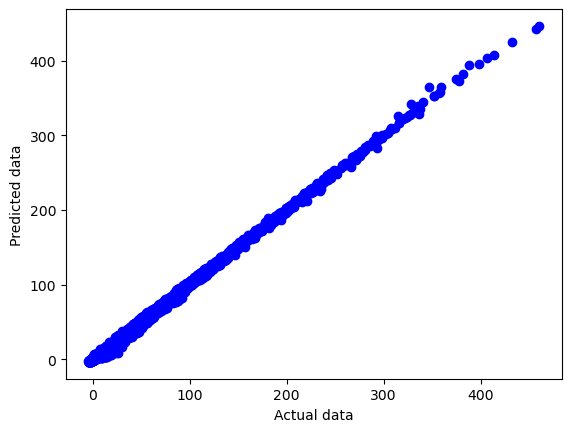

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,1200000],[0,1200000], color = "red")
#plt.axis ([0,1200000,0,1200000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

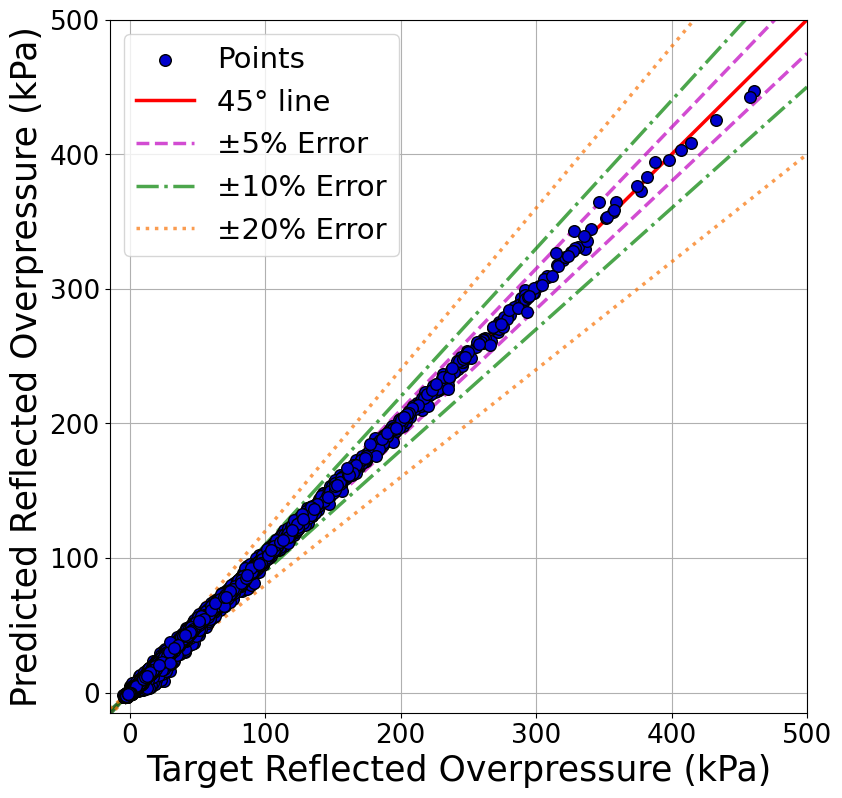

In [50]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = -15
u_l = 500

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Reflected Overpressure (kPa)',fontsize = 25)
plt.xlabel('Target Reflected Overpressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 21)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('Section3_ANN1.png', dpi=300, bbox_inches='tight')

In [42]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

8384/8384 [==============================] - 22s 3ms/step
0.27565877858307586
0.2759569839124428


In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9989516585694967


In [45]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.999002333439774


In [46]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 12.69%
Within 10% margin 18.28%
Within 20% margin 23.26%
Out of 20% margin 76.74%


In [47]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.998951576495614


In [51]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.6430015568129478

In [52]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.2759569839124428